# Tanzania Water Wells

## Business Problem

- Stakeholder: Tanzanian Ministry of Water 

- True business problem: Predict the functionality of wells by reducing false negatives and false positives, the main focus being on false negatives. 

- Deliverables: Inference or Prediction?
    - Prediction
- Context: 
    - False negative: Well functionality prediction says it is actully functional when it is not functional.
        
    - False positive: Well functionality prediction says it is not functional when it is functional.
        
    - We would prefer reducing **false positives** over false negatives

## Evalutation Metric

- Which metric would make sense to primarily use as we evaluate our models?
    - Accuracy - balances the two kinds of errors (but is impractical with imbalanced targets)
    - **Precision** - helps reduce false positives
    - **Recall** - helps reduce false negatives
    - F1-Score - balances recall & precision (and is beter than accuracy with imbalaced targets)
    - ROC-AUC - helps focus on better probability outputs (makes sure our predicted probabilities are better)
    
We will primarily be focusing on recall 

## Data Understanding 

### Terminology

**Define important variables and what they are**
- Functional: 
- Not functional:
- Needs repair:

## Imports

In [1]:
from datetime import date
from time import strftime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder,  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, recall_score,accuracy_score, confusion_matrix, classification_report


In [6]:
features = pd.read_csv('../data/tanzania_features.csv')
features

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
target=pd.read_csv('../data/tanzania_target.csv')
target

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [8]:
new_df = features.merge(target, on='id')

In [9]:
clean_df=new_df.drop(columns=['id', 'waterpoint_type', 'scheme_name', 'funder',
        'num_private', 'permit', 'extraction_type', 'extraction_type_group',
        'region_code','lga','ward', 'recorded_by', 'public_meeting',
        'scheme_management', 'payment','water_quality', 'source_class','subvillage','quantity_group'
                             ,'management', 'source_type'])

In [10]:
clean_df = clean_df[clean_df['construction_year']!=0]

In [11]:
clean_df = clean_df[clean_df['longitude']!=0]

In [12]:
clean_df = clean_df[clean_df['latitude']!=-2.000000e-08]

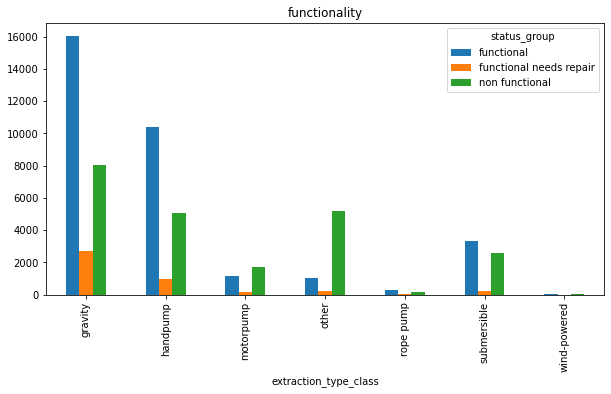

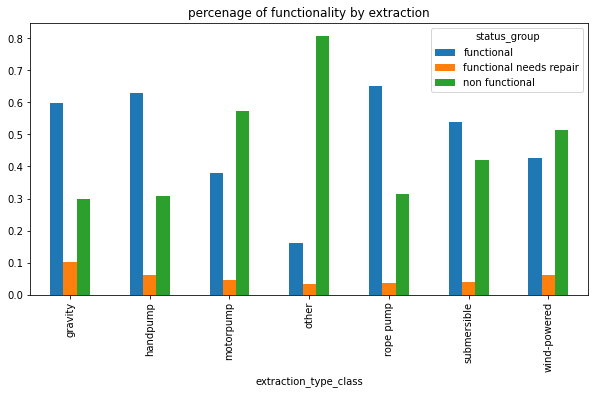

In [13]:
mplines = new_df.groupby('extraction_type_class')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('extraction_type_class')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("percenage of functionality by extraction")
plt.show()

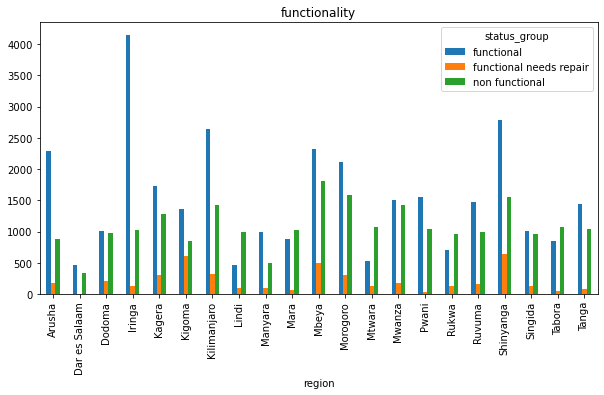

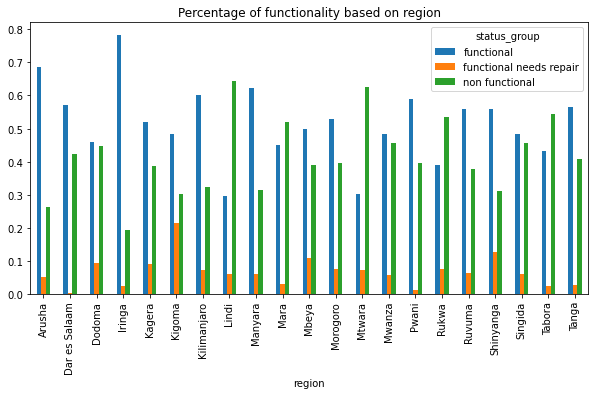

In [14]:
#functionality in region 
mplines = new_df.groupby('region')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('region')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of functionality based on region")
plt.show()

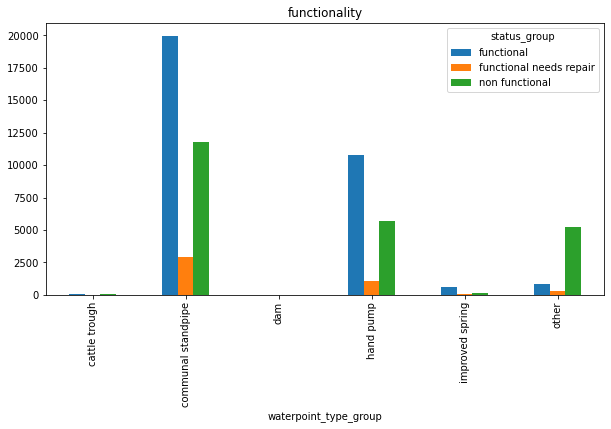

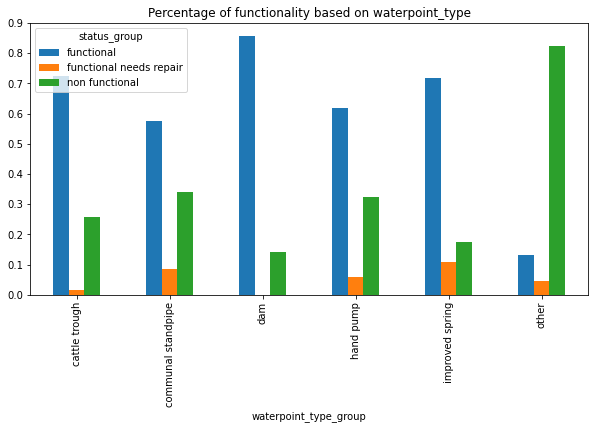

In [15]:
#waterpoint_type_group functionality 
mplines = new_df.groupby('waterpoint_type_group')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('waterpoint_type_group')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of functionality based on waterpoint_type")
plt.show()

In [16]:
#combining non-functional and needs repair 
clean_df['status_group'] = clean_df["status_group"].replace("functional needs repair", "non functional")

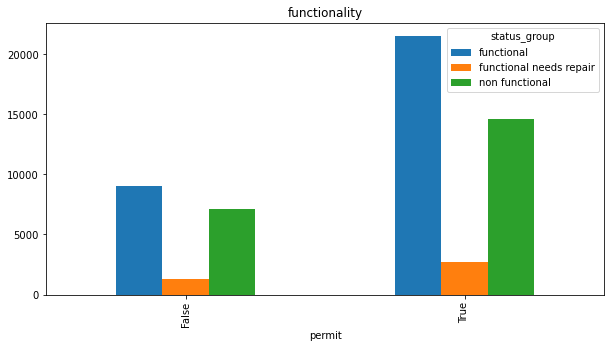

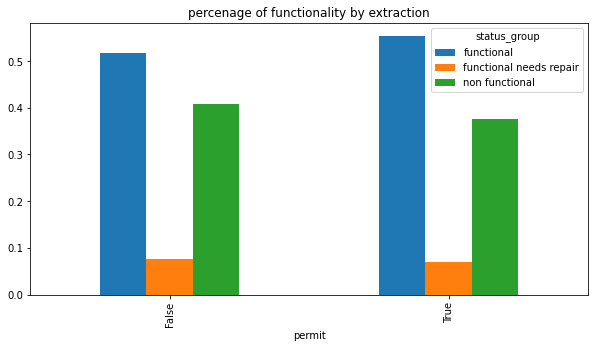

In [17]:
# permit vs non-permit 
mplines = new_df.groupby('permit')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('permit')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("percenage of functionality by extraction")
plt.show()

In [18]:
cat_df=clean_df[['status_group','region','extraction_type_class',
                 'construction_year','source','quantity','longitude','latitude']]

In [19]:
model_df = pd.get_dummies(cat_df)
model_df

,construction_year,longitude,latitude,status_group_functional,status_group_non functional,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,1999,34.938093,-9.856322,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2010,34.698766,-2.147466,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2009,37.460664,-3.821329,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1986,38.486161,-11.155298,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,2009,39.172796,-4.765587,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,1967,38.044070,-4.272218,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
59394,2007,37.634053,-6.124830,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
59395,1999,37.169807,-3.253847,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
59396,1996,35.249991,-9.070629,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [20]:
y= model_df['status_group_non functional']
X= model_df.drop(columns=['status_group_non functional', 'status_group_functional'])

In [21]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2022, stratify=y)


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2022, stratify=y_tr)


In [23]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [24]:
from sklearn.inspection import permutation_importance
logreg = LogisticRegression()


In [25]:
logreg = modeling_function(logreg, X_train, y_train, X_val, y_val)


Training accuracy:  0.7059349622580761
Validation accuracy:  0.7117957032833401


/Users/litzysalazar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
perm_log=permutation_importance(logreg,X_test,y_test, n_repeats=10, random_state=2022)
perm_log

{'importances_mean': array([-6.89179876e-05,  1.44727774e-03,  1.32667126e-03,  4.39352171e-03,
         8.61474845e-05,  4.99655410e-04,  3.01516196e-03,  3.44589938e-05,
         8.44245348e-04,  7.58097864e-04,  5.84079945e-03,  1.89524466e-04,
         1.17160579e-03,  1.72294969e-04,  1.72294969e-05,  8.95933839e-04,
         1.89524466e-03, -3.44589938e-05,  2.70503101e-03,  1.55065472e-04,
         6.71950379e-04,  2.92729152e-02,  2.51550655e-03,  1.85217092e-02,
         9.82081323e-04,  4.56581668e-03,  0.00000000e+00,  0.00000000e+00,
         3.44589938e-05,  6.78842178e-03,  1.60234321e-03,  3.44589938e-05,
         1.11991730e-03,  7.06409373e-04, -1.10268780e-03, -1.25775327e-03,
         0.00000000e+00,  4.18504480e-02,  5.28084080e-02,  1.69365955e-02,
         5.92694693e-03, -7.40868367e-04]),
 'importances_std': array([8.44069519e-05, 1.34169003e-03, 7.06409373e-04, 9.47622329e-04,
        1.92631631e-04, 1.73402711e-03, 1.49261549e-03, 9.58678687e-04,
        1.049

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(logreg, X_train, y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

/Users/litzysalazar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/litzysalazar/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

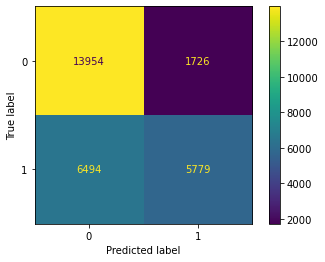

In [28]:
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
plot_confusion_matrix(logreg, X_train, y_train)

In [29]:
sm = SMOTE(random_state=2021)

In [30]:
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [31]:
X_train_sc=scaler.transform(X_train)

In [32]:
X_train_res, y_train_res = sm.fit_resample(X_train_sc, y_train)

In [33]:

logreg2 = LogisticRegression(penalty='l1', solver='liblinear')

In [34]:
logreg2.fit(X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [35]:
logreg2 = modeling_function(logreg2, X_train, y_train, X_val, y_val)


Training accuracy:  0.7312274174507208
Validation accuracy:  0.7379408188082691


In [36]:
logreg2_coefs = pd.DataFrame(np.abs(logreg2.coef_.T), columns=['coefficient'], index=X_train.columns)


In [37]:
sorted2_coefs = logreg2_coefs.sort_values(by='coefficient', ascending=False)


In [38]:
forest = RandomForestClassifier(max_depth=2, random_state=101)
forest.fit(X_train, y_train)


y_forest_pred = forest.predict(X_test)

print('Accuracy of random forest classifier: {:.2f}'.format(forest.score(X_test, y_test)))

Accuracy of random forest classifier: 0.70


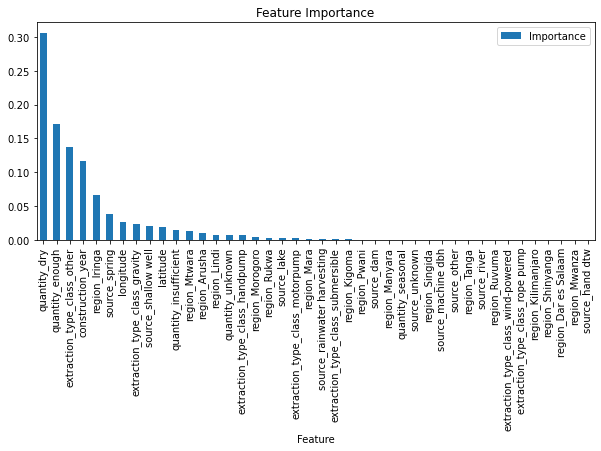

In [39]:
importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': forest.feature_importances_}).set_index('Feature').sort_values('Importance',ascending=False)

# plot the importances
importances = importances.plot(kind='bar', figsize=(10,4))
importances = importances.set_title("Feature Importance")
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

In [54]:
rf_gs = GridSearchCV(estimator=forest, param_grid=param_grid1, scoring='accuracy')


In [55]:
rf_gs.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(max_depth=2, random_state=101),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [43]:
forest_model = rf_gs.best_estimator_


In [44]:
modeling_function(forest_model, X_train, y_train, X_val, y_val)


Training accuracy:  0.7936536328837692
Validation accuracy:  0.7813133360356709


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=101)

In [45]:
dt = DecisionTreeClassifier(random_state = 2022)


In [46]:
dt = modeling_function(dt, X_train, y_train, X_val, y_val)


Training accuracy:  1.0
Validation accuracy:  0.7805026347790839


In [47]:

param_grid2 = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

dtree_gscv = GridSearchCV(dt, param_grid2, cv=3)
    
dtree_gscv.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [48]:
dtree_gscv.best_estimator_

DecisionTreeClassifier(max_depth=14, random_state=2022)

In [49]:
modeling_function(dtree_gscv, X_train, y_train, X_val, y_val)

Training accuracy:  0.832146817872858
Validation accuracy:  0.7800972841507904


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [50]:
final_model = dtree_gscv

In [51]:
y_pred = final_model.predict(X_test)


In [52]:
print('-'*40)
print('Accuracy Score:')
print(accuracy_score(y_test, y_pred))

print('-'*40)
print('Recall Score:')
print(recall_score(y_test, y_pred))

print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_pred))

----------------------------------------
Accuracy Score:
0.7851481736733288
----------------------------------------
Recall Score:
0.7048665620094191
----------------------------------------
Confusion Matrix:
[[2761  495]
 [ 752 1796]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3256
           1       0.78      0.70      0.74      2548

    accuracy                           0.79      5804
   macro avg       0.78      0.78      0.78      5804
weighted avg       0.79      0.79      0.78      5804



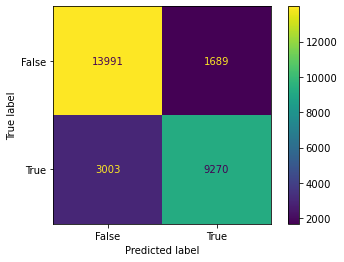

In [53]:
plot_confusion_matrix(dtree_gscv, X_train, y_train, display_labels=['False', 'True']);